<h2>Método das Grades de Clusterização</h2>


<h4> Objetivo: Identificar clusters usando a distância entre indivíduos em regiões estreitas (grades). Com a médias dessas distâncias, consigo definir um Threshold de separação entre clusters. </h4>

<p>Calcular distâncias na Vertical;</p>


<p>Calcular distâncias na Horizontal;</p>



Se na vertical tiver apenas 1 indivíduo, definir cluster com linhas subsequentes, inferior, superior e laterais;

    Verificar se essas linhas já pertencem a um cluster;

Se tiver mais de 1 indivíduo, verificar se está entre a média das distâncias verticais e entre a média das distâncias horizontais;

    Caso pertença ser englobado pelo cluster;
    
    Caso não pertença, criar novo cluster;
    
    
<h2> Definição de um Cluster </h2>

<h3> <i><center> cluster = [xi,xf,yi,yf] </center></i></h3>


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import math
from IPython.display import display, HTML
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_moons

X, y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)



In [ ]:
x.tolist()

In [28]:
def write_data(file,x,y):
    df['x'] = x
    df['y'] = y
    df.to_excel(file)

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def axis_mean(x,y):
    ## algorithm

    # calculate mean of vertical distance;
    # assume a crescent sorted list;

    a = x[0]
    count = 0
    mean_list = list()
    intermediate_mean_list = list()
    for i in x:
        if i == a:
            #print("X: {}, Y: {}".format(i,y[count]))
            intermediate_mean_list.append(y[count])
        else:
            mean_list.append(intermediate_mean_list)
            intermediate_mean_list = list()
            #print(mean_list)
            #print("\n")
            #print("X: {}, Y: {}".format(i,y[count]))
            intermediate_mean_list.append(y[count])
            a = i
        count += 1

    medias = list()
    for k in mean_list:
        intermediate_mean_list = list()
        #print("\nIntermediate List: {}".format(k))
        for u in range(len(k)-1):
            a = k[u+1] - k[u]
            intermediate_mean_list.append(a)
            #print(a)

        if mean(intermediate_mean_list) != 0:
            medias.append(mean(intermediate_mean_list))

    axis_mean = mean(medias)
    return axis_mean

def distances(x,y):
    a = x[0]
    count = 0
    mean_list = list()
    intermediate_mean_list = list()
    for i in x:
        if i == a:
            #print("X: {}, Y: {}".format(i,y[count]))
            intermediate_mean_list.append(y[count])
        else:
            mean_list.append(intermediate_mean_list)
            intermediate_mean_list = list()
            #print(mean_list)
            #print("\n")
            #print("X: {}, Y: {}".format(i,y[count]))
            intermediate_mean_list.append(y[count])
            a = i
        count += 1

    ##############
        
    axis_list = list()
    for i in x:
        if not i in axis_list:
            axis_list.append(i)
            
        
    #print(len(mean_list))
    #print(len(axis_list))

    ####################################
    return mean_list,axis_list

def plotaa(clusters):
    list_plots = list()

    for i in clusters:
        plot_x = list()
        plot_y = list()

        plot_x.append(i[1])
        plot_x.append(i[0])
        plot_x.append(i[0])
        plot_x.append(i[1])

        plot_y.append(i[3])
        plot_y.append(i[3])
        plot_y.append(i[2])
        plot_y.append(i[2])

        list_plots.append([plot_x,plot_y])


    fig, ax = plt.subplots()

    for i in list_plots:
        ax.fill(i[0], i[1])

    plt.show()

In [3]:
# visualizar os dados
df = pd.read_excel('data.xlsx', sheet_name='data')
df.plot.scatter('x','y')

In [4]:
## Calculando a Média das Distâncias Horizontais
df = pd.read_excel('data.xlsx', sheet_name='data')

df.sort_values('y', ascending=True, inplace=True, kind='quicksort', na_position='last')

#display(df)

x = df['x']
y = df['y']


x = x.values
y = y.values

horizontal_mean = abs(axis_mean(y,x))
print("\n Média Horizontal: {}".format(horizontal_mean))


 Média Horizontal: 2.416666666666667


In [5]:
## Calculando a Média das Distâncias Verticais
df = pd.read_excel('data.xlsx', sheet_name='data')

df.sort_values('x', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    
#display(df)
  
x = df['x']
y = df['y']

x = x.values
y = y.values
vertical_mean = axis_mean(x,y)
print("\n Média Vertical: {}".format(vertical_mean))


 Média Vertical: 3.841666666666667


In [6]:
medias,axis_list = distances(x,y)

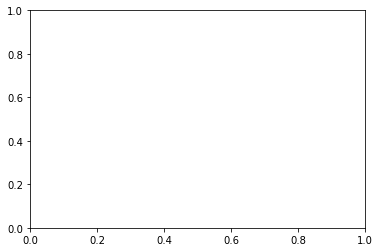

Conjunto maior que 1: [3, 4, 5, 6, 13, 15]


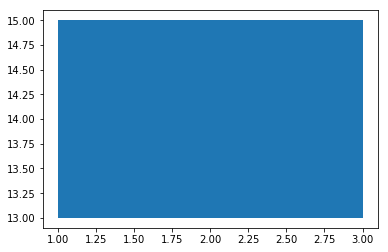

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]


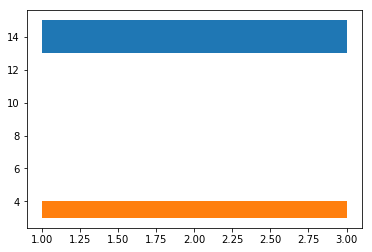

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]


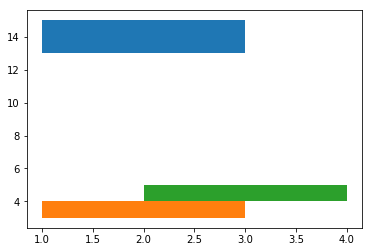

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]
Outro Cluster


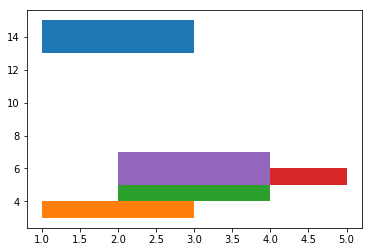

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]
Conjunto maior que 1: [3, 4, 14, 16]


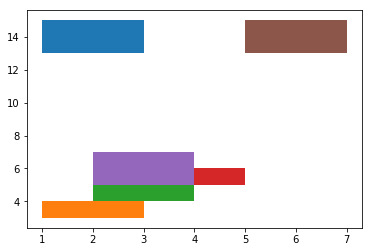

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]
Outro Cluster


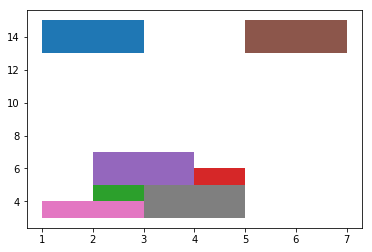

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]
Conjunto maior que 1: [7, 12]
Outro Cluster
Conjunto maior que 1: [3, 4, 14, 18]


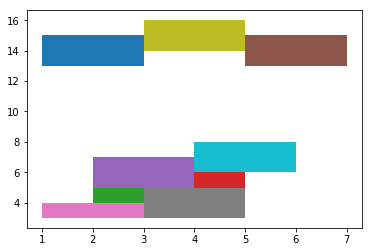

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]
Outro Cluster
Outro Cluster
Conjunto maior que 1: [6, 14]
Outro Cluster
Conjunto maior que 1: [3, 4]


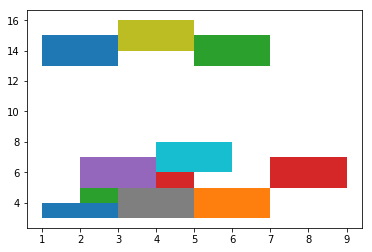

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]


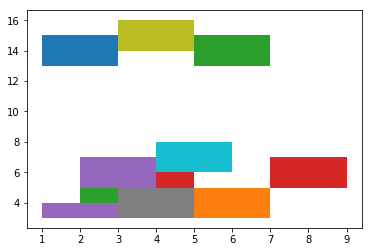

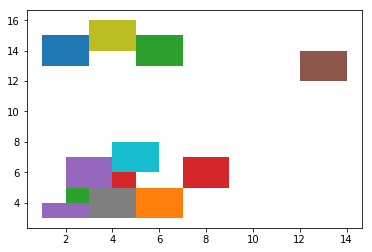

Conjunto maior que 1: [12, 14]


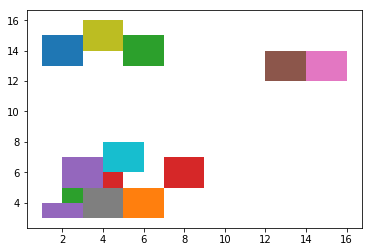

Novo Cluster
[2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26]


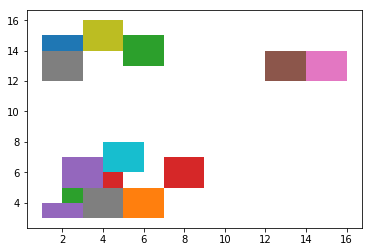

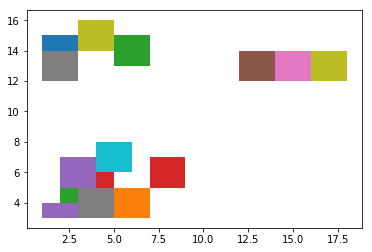

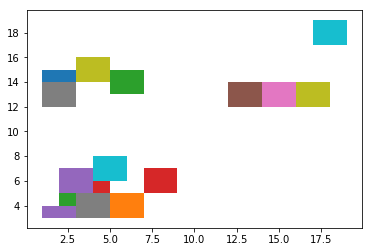

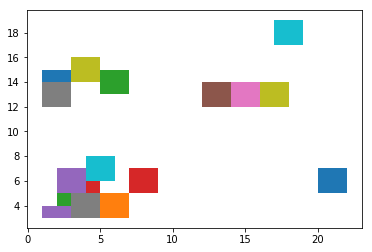

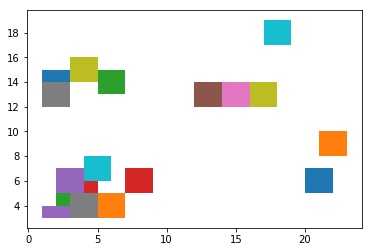

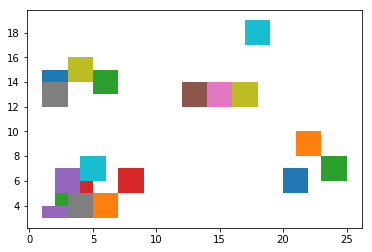

In [19]:
def verify_cluster(cluster,clusters):
    if len(clusters) == 0:
        clusters.append(cluster)
    else:
        print("\n\nClusters: {}".format(clusters))
        for i in clusters:
            print("Clusters (i): {}".format(i))
            print("Cluster teste: {}".format(cluster))
            if cluster[0] >= i[0] and cluster[1] <= i[1] and cluster[2] >= i[2] and cluster[3] <= i[3]:
                print("---Pertence a esse cluster")
                pass
            elif cluster[0] <= i[0] and cluster[1] >= i[1] and cluster[2] <= i[2] and cluster[3] >= i[3]:
                print("---Clusters(i):{} está contido em cluster: {} --remover".format(i,cluster))
                clusters.remove(i)
            elif cluster in clusters:
                print("---Cluster existente")
            elif cluster not in clusters:
                # verificar se está contido, ou se contém;
                print("---Não Pertence a esse cluster (adicionar)")
                clusters.append(cluster)
                
            
clusters = list()

expansao = 1

for i in range(len(medias)-1):
    cluster2 = list()
    if len(medias[i]) == 1:
        plotaa(clusters)
        me = medias[i]        
        xi = axis_list[i]-expansao
        xf = axis_list[i]+expansao
        yi = me[0]-expansao
        yf = me[0]+expansao
        
        cluster2.append(xi)
        cluster2.append(xf)
        cluster2.append(yi)
        cluster2.append(yf)
        
        clusters.append(cluster2)
        #verify_cluster(cluster2,clusters)
        
    else:
        me = medias[i]
        print("Conjunto maior que 1: {}".format(me))
        for j in range(len(me)-1):
            cluster_inter = []
            ## comparação par a par
            if me[j+1] - me[j] < vertical_mean:
                plotaa(clusters)
                cluster2 = list()
                if cluster_inter == []:
                    print("Novo Cluster")
                    print(axis_list)
                    xi = axis_list[j]-expansao
                    xf = axis_list[j]+expansao
                    yi = me[j]
                    yf = me[j+1]

                    cluster2.append(xi)
                    cluster2.append(xf)
                    cluster2.append(yi)
                    cluster2.append(yf)
                    clusters.append(cluster2)

                    cluster_inter = cluster2
                else:
                    print("Agrupar Cluster")
                    #yi = me[j]
                    yf = me[j+1]

                    clusters.remove(cluster_inter)
                    cluster2
                    
                    cluster2.append(cluster_inter[0])
                    cluster2.append(cluster_inter[1])
                    cluster2.append(cluster_inter[2])
                    cluster2.append(yf)
                    clusters.append(cluster2)

                    cluster_inter = cluster2
                    

                #verify_cluster(cluster2,clusters)
            else:
                #cluster_inter = cluster2
                cluster2 = list()
                print("Outro Cluster")
                xi = axis_list[i]-expansao
                xf = axis_list[i]+expansao
                yi = me[j]-expansao
                yf = me[j]+expansao

                cluster2.append(xi)
                cluster2.append(xf)
                cluster2.append(yi)
                cluster2.append(yf)
                clusters.append(cluster2)
                
                cluster_inter = cluster2
                #verify_cluster(cluster2,clusters)
    
plotaa(clusters)

#for i in clusters:
#    verify_cluster(i,clusters)
    
#plotaa(clusters)


    


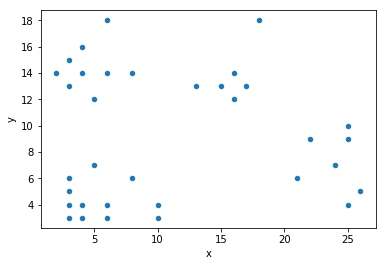

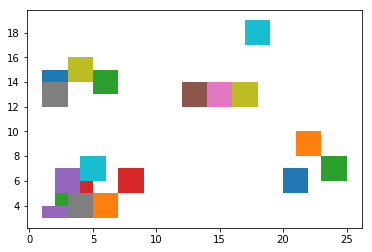

In [40]:
plotaa(clusters)
#print(clusters)
df.plot.scatter('x','y')

<h2> Conclusões </h2>

<p> </p>

